In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

## Section 1: Vary Number of Blocks

- 1 block, 80 trials per stimulus
- 2 blocks, 40 trials per stimulus
- 4 blocks, 20 trials per stimulus

In [2]:
from scipy.stats import norm

## Load summary data.
data = read_csv('data/pit_aNP.csv', index_col=0).copy()

## Compute parameters (pre-transform). 
f = lambda x: norm.ppf(x / 10.)
data.loc[data.index=='beta_pr','latent'] = data.loc['beta','latent'].apply(f).values
data.loc[data.index=='eta_pr','latent']  = data.loc['eta','latent'].apply(norm.ppf).values
data.loc[data.index=='tau_pr','latent']  = data.loc['tau','latent'].apply(np.arctanh).values
data.loc[data.index=='nu_pr','latent']   = data.loc['nu','latent'].apply(np.arctanh).values

## 
data['delta'] = data['mean'] - data['latent']

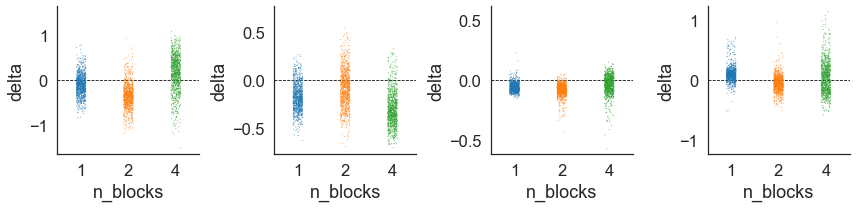

In [3]:
## Initialize canvas.
fig, axes = plt.subplots(1,4,figsize=(12,3),sharex=True)

for ax, param in zip(axes, ['beta_pr','eta_pr','tau_pr','nu_pr']):
    sns.stripplot('n_blocks', 'delta', data=data.loc[param], size=1, alpha=0.7, ax=ax)
    z = np.abs(ax.get_ylim()).max()
    ax.set(ylim=(-z,z))
    ax.axhline(color='k', lw=0.8, linestyle='--', zorder=-1)
    
sns.despine()
plt.tight_layout()

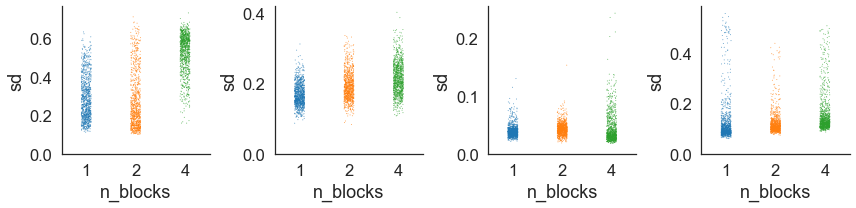

In [7]:
## Initialize canvas.
fig, axes = plt.subplots(1,4,figsize=(12,3),sharex=True)

for ax, param in zip(axes, ['beta_pr','eta_pr','tau_pr','nu_pr']):
    sns.stripplot('n_blocks', 'sd', data=data.loc[param], size=1, alpha=0.7, ax=ax)
    ax.set(ylim=(0))
        
sns.despine()
plt.tight_layout()

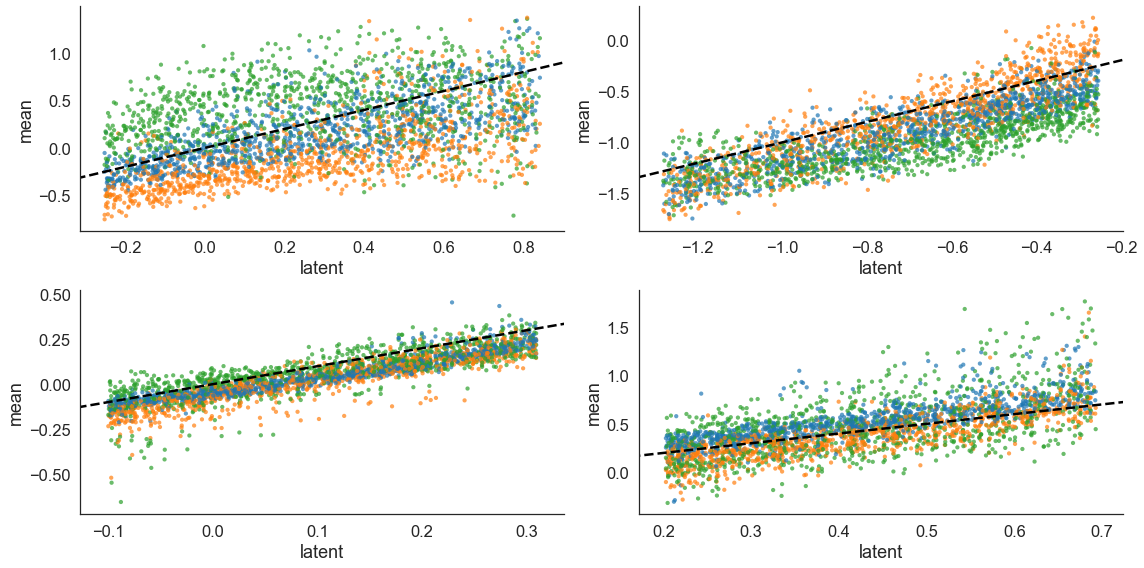

In [5]:
## Initialize canvas.
fig, axes = plt.subplots(2,2,figsize=(16,8))
palette = sns.color_palette(n_colors=3)

for ax, param in zip(axes.flatten(), ['beta_pr','eta_pr','tau_pr','nu_pr']):

    ## Plot points.
    ax = sns.scatterplot('latent','mean','n_blocks',data=data.loc[param],palette=palette,
                    size=0.5, alpha=0.7, linewidth=0, ax=ax)
    x1, x2 = ax.get_xlim(); y1, y2 = ax.get_ylim()
    ax.plot([-2.5,2.5],[-2.5,2.5],color='k',lw=2.5,linestyle='--')
    ax.set(xlim=(x1,x2),ylim=(y1,y2))
    ax.legend_.set_visible(False)
    
sns.despine()
plt.tight_layout()

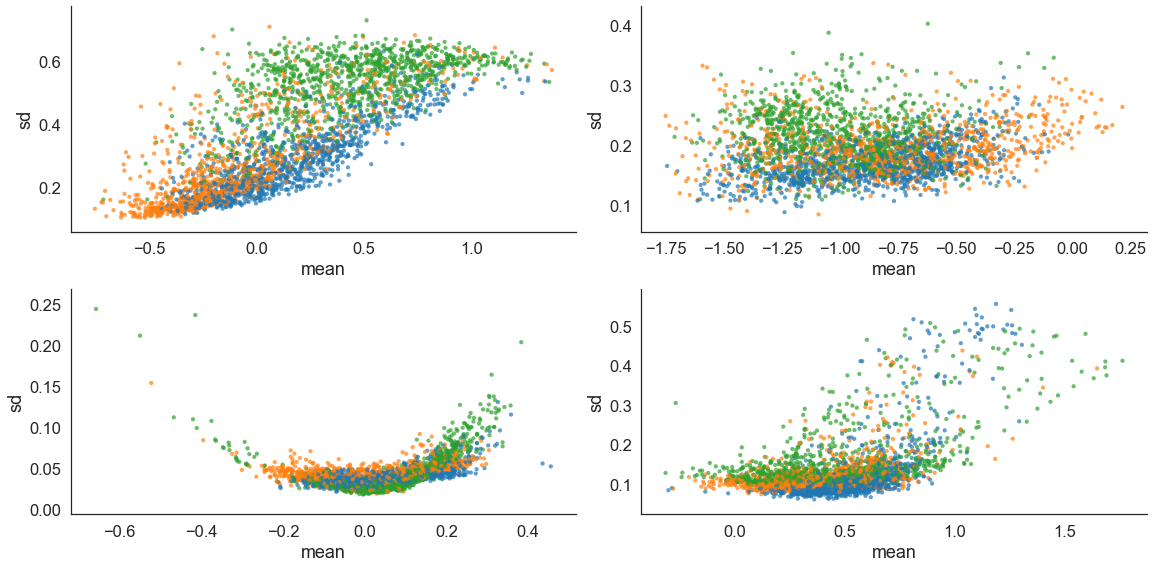

In [6]:
## Initialize canvas.
fig, axes = plt.subplots(2,2,figsize=(16,8))
palette = sns.color_palette(n_colors=3)

for ax, param in zip(axes.flatten(), ['beta_pr','eta_pr','tau_pr','nu_pr']):

    ## Plot points.
    ax = sns.scatterplot('mean','sd','n_blocks',data=data.loc[param],palette=palette,
                    size=0.5, alpha=0.7, linewidth=0, ax=ax)
    ax.legend_.set_visible(False)
    
sns.despine()
plt.tight_layout()

## Section 2: Vary Number of Trials

In [4]:
from scipy.stats import norm

## Load summary data.
data = read_csv('data/pit_trt_aNP.csv', index_col=0).copy()

## 
data['delta'] = data['mean'] - data['latent']

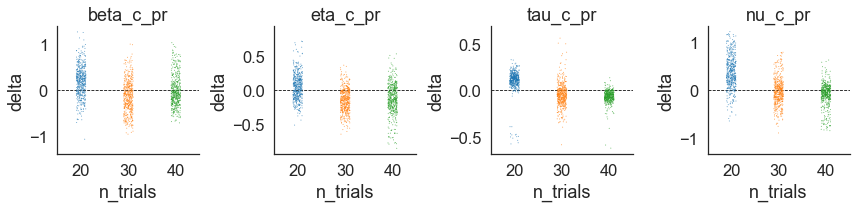

In [9]:
## Initialize canvas.
fig, axes = plt.subplots(1,4,figsize=(12,3),sharex=True)

for ax, param in zip(axes, ['beta_c_pr','eta_c_pr','tau_c_pr','nu_c_pr']):
    sns.stripplot('n_trials', 'delta', data=data.loc[param], size=1, alpha=0.7, ax=ax)
    z = np.abs(ax.get_ylim()).max()
    ax.set(ylim=(-z,z), title=param)
    ax.axhline(color='k', lw=0.8, linestyle='--', zorder=-1)
    
sns.despine()
plt.tight_layout()

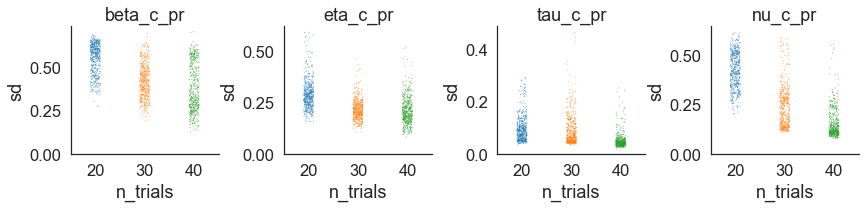

In [10]:
## Initialize canvas.
fig, axes = plt.subplots(1,4,figsize=(12,3),sharex=True)

for ax, param in zip(axes, ['beta_c_pr','eta_c_pr','tau_c_pr','nu_c_pr']):
    sns.stripplot('n_trials', 'sd', data=data.loc[param], size=1, alpha=0.7, ax=ax)
    ax.set(ylim=(0), title=param)
        
sns.despine()
plt.tight_layout()

In [46]:
for par in ['beta','eta','tau','nu']:

    for n in [20,30,40]:

        v1 = data.query(f'n_trials=="{n}"').loc[f'{par}_c_pr','mean'].var()
        v2 = data.query(f'n_trials=="{n}"').loc[f'{par}_d_pr','mean'].var()
        print( par, (v1-v2) / (v1+v2) )

beta 0.6679695280470326
beta 0.7190530917978822
beta 0.6503843738287899
eta 0.642344169944603
eta 0.6850007513867111
eta 0.43254135155963275
tau 0.40924266006676224
tau 0.6627458182763206
tau 0.5123927605442472
nu 0.7554083886207417
nu 0.3910908746605206
nu 0.3786905526244916


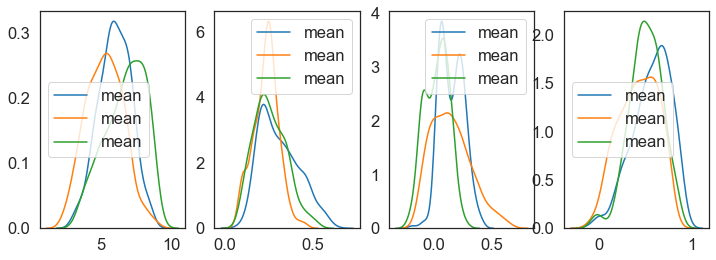

In [51]:
fig, axes = plt.subplots(1,4,figsize=(12,4))

for ax, par in zip(axes,['beta','eta','tau','nu']):

    for n in [20,30,40]:

        sns.kdeplot(data.query(f'n_trials=={n}').loc[f'{par}[1]', 'mean'], ax=ax)

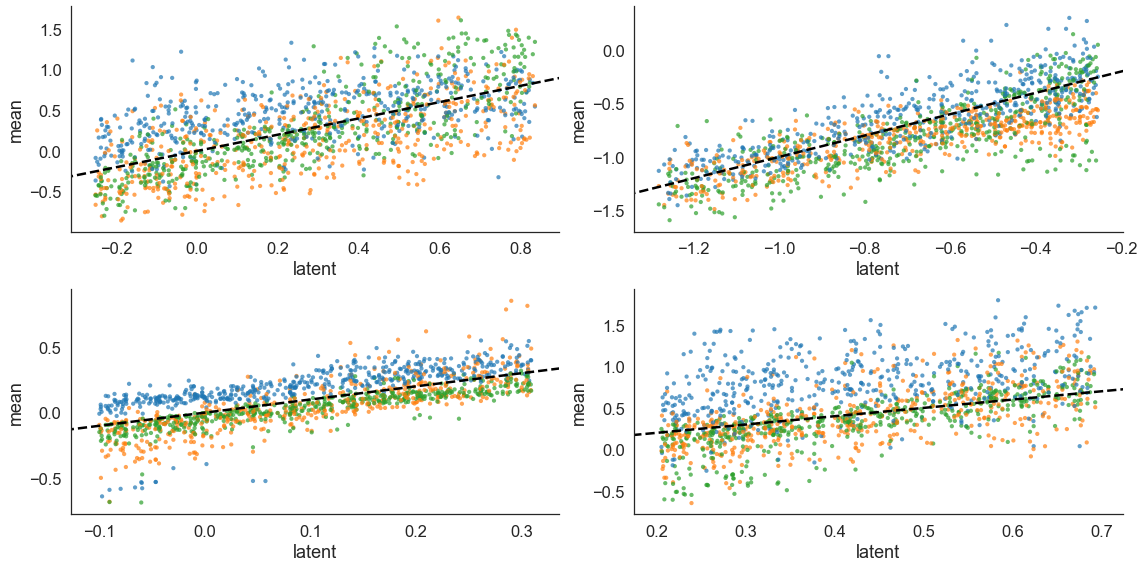

In [54]:
## Initialize canvas.
fig, axes = plt.subplots(2,2,figsize=(16,8))
palette = sns.color_palette(n_colors=3)

for ax, param in zip(axes.flatten(), ['beta_c_pr','eta_c_pr','tau_c_pr','nu_c_pr']):

    ## Plot points.
    ax = sns.scatterplot('latent','mean','n_trials',data=data.loc[param],palette=palette,
                    size=0.5, alpha=0.7, linewidth=0, ax=ax)
    x1, x2 = ax.get_xlim(); y1, y2 = ax.get_ylim()
    ax.plot([-2.5,2.5],[-2.5,2.5],color='k',lw=2.5,linestyle='--')
    ax.set(xlim=(x1,x2),ylim=(y1,y2))
    ax.legend_.set_visible(False)
    
sns.despine()
plt.tight_layout()

In [44]:
data

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,latent,subj,n_blocks,n_trials
beta_c_pr,0.148940,0.007764,0.264735,-0.315317,-0.036109,0.127526,0.309128,0.728342,1162.727056,0.999743,0.398189,454,2,40
beta_d_pr,-0.477592,0.006584,0.244274,-1.014391,-0.622742,-0.455220,-0.307145,-0.064650,1376.562919,0.998797,0.398189,454,2,40
eta_c_pr,-0.286360,0.007971,0.252237,-0.729155,-0.456712,-0.307393,-0.132977,0.263457,1001.272310,1.001612,-0.311697,454,2,40
eta_d_pr,-0.177196,0.006070,0.224884,-0.585947,-0.336535,-0.187654,-0.026351,0.274768,1372.767654,1.000205,-0.311697,454,2,40
tau_c_pr,0.078825,0.001090,0.043789,-0.003766,0.048397,0.078745,0.106912,0.169909,1612.446962,1.001070,0.141861,454,2,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tau[1],0.160880,0.004777,0.112421,0.005001,0.081391,0.144742,0.218707,0.432139,553.747777,1.003706,0.114304,438,2,30
tau[2],-0.188896,0.003027,0.087801,-0.396901,-0.233481,-0.173508,-0.127430,-0.058137,841.092604,1.001188,0.114304,438,2,30
nu[1],0.047774,0.005897,0.193897,-0.297067,-0.091147,0.032427,0.176831,0.454022,1081.145801,0.999613,0.234126,438,2,30
nu[2],-0.822004,0.004567,0.142074,-0.984744,-0.929491,-0.857239,-0.752374,-0.468253,967.669848,1.002226,0.234126,438,2,30
